In [1]:
import pandas as pd
import numpy as np

In [2]:
engage = pd.read_csv('takehome_user_engagement.csv')

In [3]:
engage

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [4]:
engage['time_stamp'].max()

'2014-06-06 14:58:50'

In [5]:
num_visits = engage.groupby(['user_id']).sum() 

In [6]:
num_visits

,visited
user_id,
1,1
2,14
3,1
4,1
5,1
...,...
11996,1
11997,1
11998,1


In [7]:
num_visits.dtypes

visited    int64
dtype: object

In [8]:
num_visits = num_visits.loc[num_visits['visited'] >= 3]

In [9]:
num_visits

,visited
user_id,
2,14
10,284
20,7
33,18
42,342
...,...
11975,216
11980,8
11981,4


In [10]:
keep_ind = num_visits.index.to_numpy()

In [11]:
keep_ind

array([    2,    10,    20, ..., 11981, 11988, 11991], dtype=int64)

In [12]:
engage = engage.loc[engage['user_id'].isin(keep_ind), :]

In [13]:
engage = engage.drop(columns=['visited'])

In [14]:
engage['time_stamp'].min()

'2012-05-31 15:47:36'

In [15]:
engage['time_stamp'].max()

'2014-06-04 23:56:26'

In [16]:
engage['time_stamp'].dtype

dtype('O')

In [20]:
engage["time_stamp"] = pd.to_datetime(engage["time_stamp"])

In [21]:
engage.sort_values(by=['user_id', 'time_stamp'], inplace=True)

In [22]:
engage.shape

(201002, 2)

In [25]:
def within_seven_days(timestamp1, timestamp2):
    return abs((timestamp1 - timestamp2).days) <= 6

In [26]:
adopted_users = []

for user_id in engage['user_id'].unique():
    user_df = engage[engage['user_id'] == user_id]
    
    for i in range(len(user_df)):
        timestamp = user_df.iloc[i]['time_stamp']
        count = 1
        
        for j in range(i+1, len(user_df)):
            if within_seven_days(timestamp, user_df.iloc[j]['time_stamp']):
                count +=1
            if count>=3:
                adopted_users.append(user_id)
                break
                
adopted_users = list(set(adopted_users))          

In [27]:
adopted_users

[8192,
 2,
 8196,
 8201,
 10,
 20,
 8214,
 8217,
 8220,
 8221,
 33,
 8232,
 8233,
 42,
 43,
 8235,
 8239,
 50,
 8243,
 53,
 8252,
 63,
 8255,
 8258,
 8259,
 69,
 8265,
 74,
 80,
 81,
 82,
 8277,
 8278,
 87,
 8280,
 8294,
 8297,
 8310,
 8311,
 8319,
 133,
 135,
 141,
 8334,
 146,
 153,
 8348,
 160,
 165,
 168,
 172,
 174,
 8366,
 8371,
 185,
 188,
 8381,
 8383,
 197,
 200,
 8393,
 202,
 203,
 8394,
 8399,
 209,
 8401,
 8403,
 214,
 8408,
 8415,
 230,
 8426,
 8435,
 245,
 247,
 8440,
 8442,
 8448,
 263,
 265,
 8460,
 8463,
 8466,
 275,
 280,
 283,
 297,
 298,
 8493,
 305,
 310,
 311,
 8505,
 8507,
 8508,
 8511,
 321,
 322,
 8523,
 341,
 8538,
 347,
 351,
 8553,
 363,
 370,
 8569,
 8571,
 383,
 8581,
 397,
 401,
 8593,
 8595,
 8601,
 8602,
 418,
 8615,
 430,
 8622,
 445,
 8639,
 8640,
 450,
 460,
 462,
 8654,
 469,
 471,
 472,
 479,
 8673,
 483,
 8675,
 8677,
 8679,
 492,
 494,
 497,
 8689,
 502,
 8695,
 506,
 509,
 510,
 8701,
 512,
 8704,
 8706,
 8708,
 518,
 8712,
 522,
 529,
 8721,
 8

In [ ]:
# then perform EDA to see which variables might be most predictive in determining an adopted user
# split data into train and test subsets, X = data[columns], y = data['adopted_user']
# then create linear regression model and assess results then do random forest, or SVM or Gradient Boosting, or Decision Tree or K-nearest neighbros
#look into windows method and rolling method ^

In [35]:
data = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [36]:
data.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [37]:
data=data.dropna()

In [38]:
data.shape

(4776, 10)

In [39]:
data.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [46]:
data['adopted_user'] = data['object_id'].apply(lambda x: 1 if x in adopted_users else 0)

In [49]:
data

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11980,11981,2013-03-05 01:53:48,Fry Tyler,TylerFry@gmail.com,GUEST_INVITE,1.364868e+09,0,0,110,5775.0,0
11981,11982,2013-12-06 14:39:15,Barajas Maria,MariaCBarajas@gmail.com,ORG_INVITE,1.386341e+09,1,1,57,2527.0,0
11989,11990,2013-07-05 21:00:48,Juhl Aase,AasePJuhl@jourrapide.com,ORG_INVITE,1.373144e+09,0,0,25,3944.0,0
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0


In [61]:
data = pd.get_dummies(data, columns=['creation_source'], prefix=['INV'])

In [67]:
data['last_session_creation_time'] = data['last_session_creation_time'].astype(float)

In [71]:
from sklearn.model_selection import train_test_split

columns = ['INV_GUEST_INVITE', 'INV_ORG_INVITE', 'last_session_creation_time', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']
X = data[columns]
y = data['adopted_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123, stratify=y)

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3820, 5), (956, 5), (3820,), (956,))

In [73]:
X_train.dtypes

INV_GUEST_INVITE                uint8
INV_ORG_INVITE                  uint8
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
dtype: object

In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
lr_accuracy = accuracy_score(y_test, y_pred)
print(report)
print('Accuracy Score: ', lr_accuracy)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       773
           1       0.00      0.00      0.00       183

    accuracy                           0.81       956
   macro avg       0.40      0.50      0.45       956
weighted avg       0.65      0.81      0.72       956

Accuracy Score:  0.8085774058577406


C:\Users\amand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [79]:
report = classification_report(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
print(report)
print('Accuracy Score: ', rf_accuracy)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       773
           1       0.55      0.57      0.56       183

    accuracy                           0.83       956
   macro avg       0.73      0.73      0.73       956
weighted avg       0.83      0.83      0.83       956

Accuracy Score:  0.8294979079497908


In [81]:
features = data[columns]
y = data['adopted_user']
X = features

In [82]:
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

                     Features  Importance scores
0            INV_GUEST_INVITE           0.001964
1              INV_ORG_INVITE           0.002593
2  last_session_creation_time           0.004162
3    opted_in_to_mailing_list           0.004713
4  enabled_for_marketing_drip           0.986568


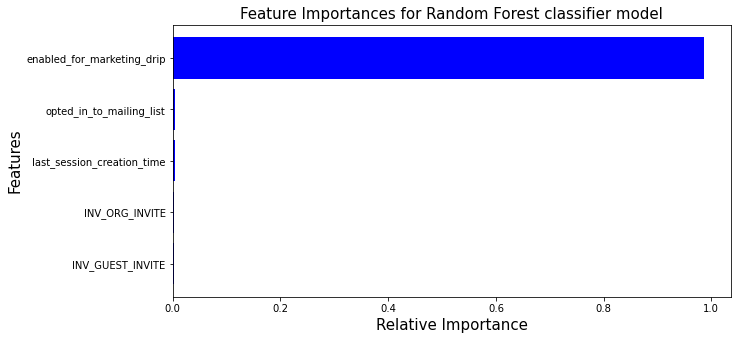

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

index = [0,1,2,3,4]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.show()